# Which player has the most points to be next year´s best golfer

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as plt
import seaborn as sns

#### I am going to be using pgaTourData for the years 2017 and 2018. 'golf_data.csv' is a reduced and clean version of 'pgaTourData.csv' from the Kaggle golf dataset in the 1st jupyter notebook. 

In [4]:
df_golf = pd.read_csv('data/golf_data.csv')

In [5]:
df_golf.head()

,Unnamed: 0,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money
0,0,Henrik Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487
1,1,Ryan Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203
2,2,Chez Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018
3,3,Ryan Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608
4,4,Brian Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763


####  In order to make presumptions I´m going to take what I consider to be the most important golf metrics, and I am going to use them depending on it´s importance related to the game. To obtain their 'importance' I will use their correlations with the average score:

In [6]:
df_golf.corr(method = 'pearson')

,Unnamed: 0,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money
Unnamed: 0,1.000000,-0.059940,-0.584963,-0.865680,0.039473,-0.333328,-0.196987,-0.035698,0.113152,-0.028456,0.021379,-0.040629,0.000325,-0.100292,-0.119765,-0.077095,0.039321,-0.026894
Rounds,-0.059940,1.000000,0.096178,0.022152,0.145598,0.304078,0.010795,0.147070,-0.345654,0.375095,0.125912,0.400573,0.033003,0.317026,0.221764,0.276473,0.105040,0.301076
Fairway_Percentage,-0.584963,0.096178,1.000000,0.111276,-0.439460,0.381394,0.236871,0.230514,-0.189344,0.026938,-0.045935,0.048697,-0.039612,0.181384,0.237628,0.161663,-0.085005,0.009446
Year,-0.865680,0.022152,0.111276,1.000000,0.226611,0.186522,0.092460,-0.087525,-0.040506,0.029641,0.007024,0.031122,0.023346,0.028998,0.016834,0.009417,0.007282,0.037892
Avg_Distance,0.039473,0.145598,-0.439460,0.226611,1.000000,0.359577,0.173347,-0.154406,-0.403167,0.409369,0.272563,0.389985,-0.123221,0.402398,0.643721,0.215262,-0.079841,0.415772
gir,-0.333328,0.304078,0.381394,0.186522,0.359577,1.000000,0.548651,0.129249,-0.600835,0.375015,0.187630,0.373561,-0.204436,0.577352,0.629901,0.593165,-0.019838,0.358602
Average_Putts,-0.196987,0.010795,0.236871,0.092460,0.173347,0.548651,1.000000,-0.450432,0.161003,-0.193433,-0.147710,-0.171583,-0.663268,-0.169504,0.313572,0.131752,-0.419566,-0.199834
Average_Scrambling,-0.035698,0.147070,0.230514,-0.087525,-0.154406,0.129249,-0.450432,1.000000,-0.544020,0.313745,0.112102,0.311153,0.366179,0.543458,0.099399,0.271340,0.607236,0.306073
Average_Score,0.113152,-0.345654,-0.189344,-0.040506,-0.403167,-0.600835,0.161003,-0.544020,1.000000,-0.758952,-0.404509,-0.732059,-0.277791,-0.961917,-0.602422,-0.707785,-0.417551,-0.748177
Points,-0.028456,0.375095,0.026938,0.029641,0.409369,0.375015,-0.193433,0.313745,-0.758952,1.000000,0.780882,0.861735,0.204410,0.733906,0.477488,0.537391,0.312214,0.970333


#### We are going to use this numbers later to come up with the predicted ranking for the next year. They will represent the level of importance of each golf shot in the game.

####  Important correlations (in my golfing opinion):

In [8]:
"""
coor(Avg_Distance, Average_Score) = -0.403167
coor(Average_SG_Putts, Average_Score) = -0.277791
coor(SG_APR, Average_Score) = -0.707785
coor(SG_ARG, Average_Score) = -0.417551
"""

'\ncoor(Avg_Distance, Average_Score) = -0.403167\ncoor(Average_SG_Putts, Average_Score) = -0.277791\ncoor(SG_APR, Average_Score) = -0.707785\ncoor(SG_ARG, Average_Score) = -0.417551\n'

#### Golfers who have made over 4,500,000 dollars are going to be noticed as Top golfers and will appear from now on in the charts as orange dots. The orange dots should always be among the best stats, if not,  they variables that we are using for the prediction would not be representative

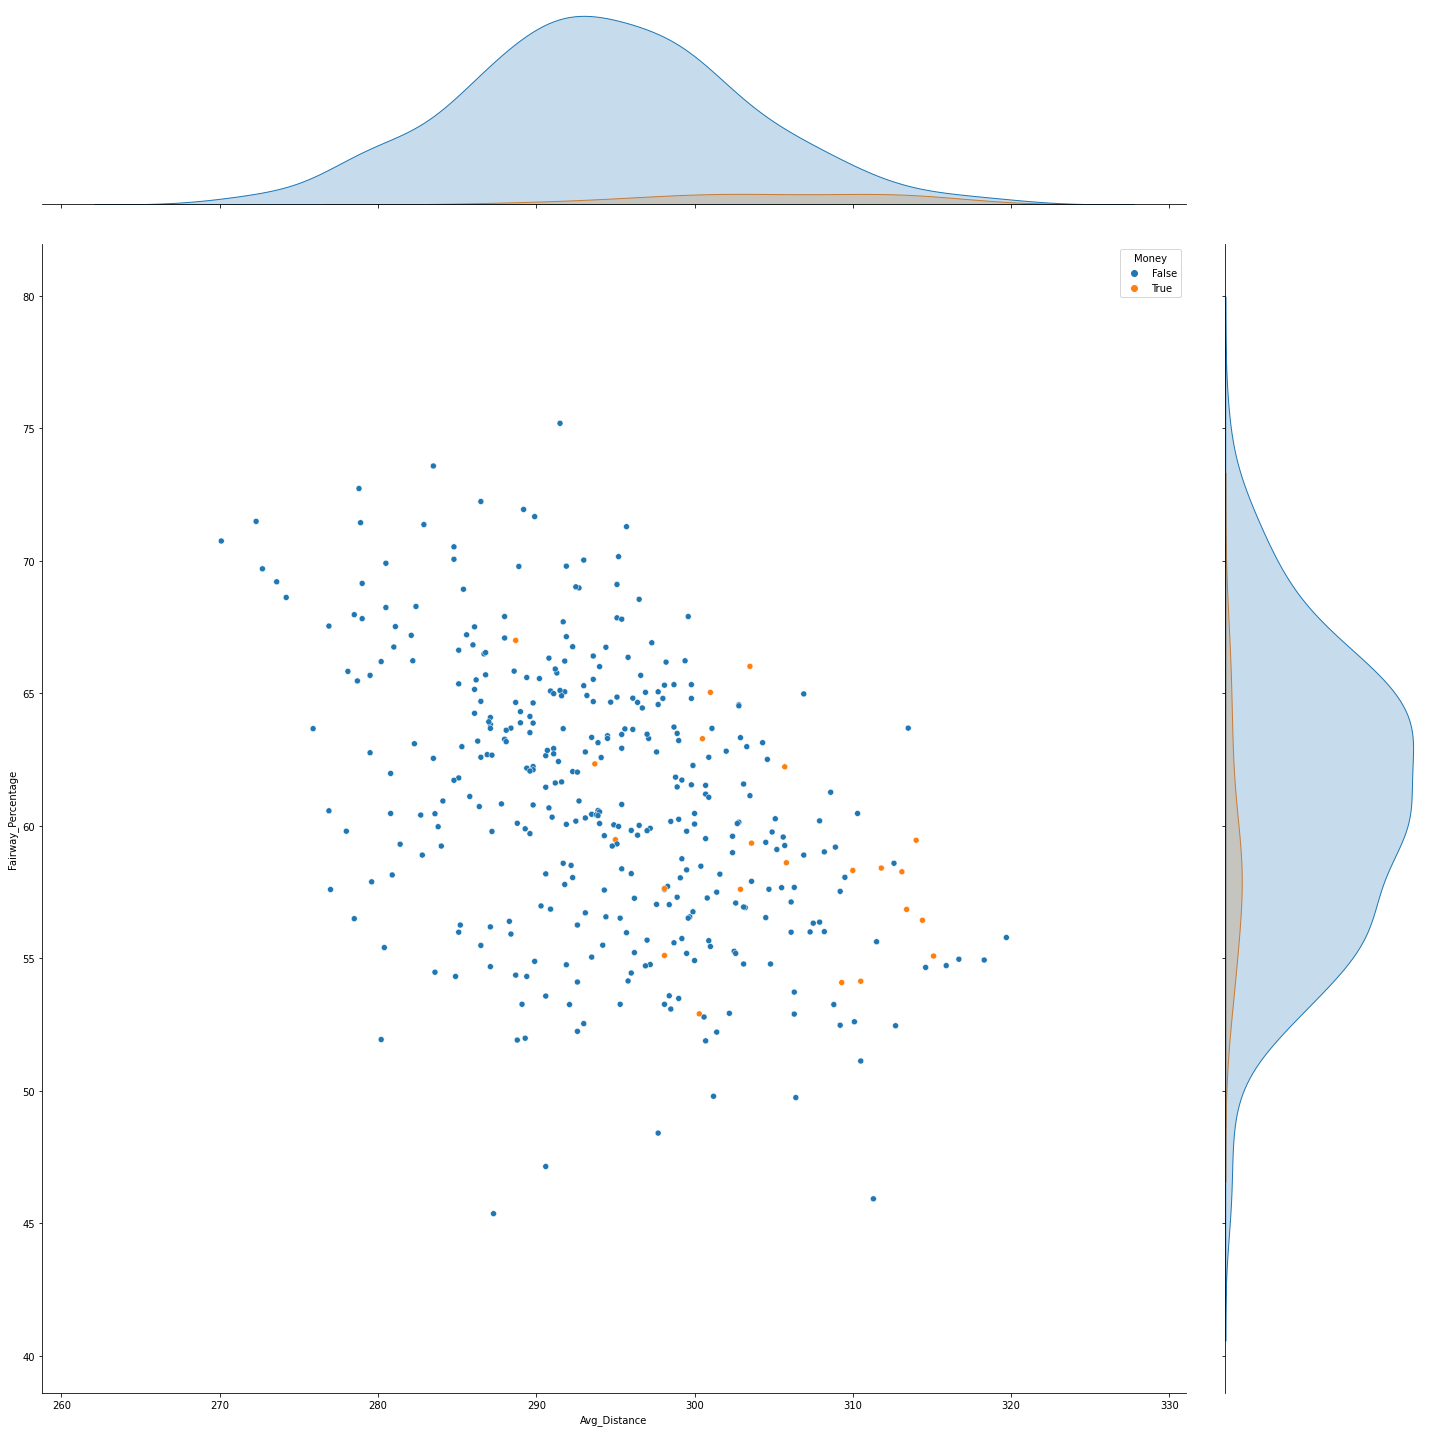

In [10]:
# The following jointplot differentiates golfers by driving range (Avg_Distance) and accuracy (Fairway_Percentage)
# Orange dots should have longer Avg_Distance (one of the variables that we are using)

sns.jointplot(x= df_golf.Avg_Distance, y= df_golf.Fairway_Percentage, hue= df_golf.Money > 4500000, height= 20)

In [11]:
# Longest Hitters

df_driving_ranking = df_golf[['Year','Player_Name','Avg_Distance', 'Fairway_Percentage']].copy()
df_driving_ranking.sort_values(by = 'Avg_Distance', inplace = True, ascending = True)
df_driving_ranking.head()


,Year,Player_Name,Avg_Distance,Fairway_Percentage
195,2017,Jim Furyk,270.1,70.75
194,2017,Brian Stuard,272.3,71.49
199,2017,Zac Blair,272.7,69.70
200,2017,Søren Kjeldsen,273.6,69.21
203,2017,Ken Duke,274.2,68.62


In [19]:
# Ranking of the longest drivers.


df_golf.sort_values(by = 'Avg_Distance', inplace = True, ascending = True)
df_golf.reset_index(inplace = True)
df_golf['driving_ranking'] = df_golf.index



df_golf.head()


,index,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,...,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money,driving_ranking,best_putters
0,253,Jim Furyk,54,70.75,2017,270.1,65.72,29.36,61.03,71.071,...,0,1,0.187,-0.023,-0.491,0.492,-0.036,558097,0,253
1,103,Brian Stuard,93,71.49,2017,272.3,63.59,28.92,57.99,71.720,...,0,0,-0.137,-0.343,-0.340,0.171,-0.164,588806,1,103
2,187,Zac Blair,105,69.70,2017,272.7,64.70,28.87,65.50,71.007,...,0,1,0.035,-0.044,-0.155,-0.141,0.218,788352,2,187
3,349,Søren Kjeldsen,58,69.21,2017,273.6,62.02,29.00,51.64,71.390,...,0,1,0.473,-0.182,-0.424,-0.090,-0.142,722913,3,349
4,23,Ken Duke,77,68.62,2017,274.2,63.69,29.38,56.47,72.078,...,0,0,-0.452,-0.887,-0.179,-0.256,0.000,225907,4,23


In [20]:
# Line Readers (Putters)

df_best_putters = df_golf[['Year', 'Player_Name', 'Wins', 'Average_SG_Putts']].copy()
df_best_putters.sort_values(by = 'Average_SG_Putts', inplace = True, ascending = True)
df_best_putters.head()

,Year,Player_Name,Wins,Average_SG_Putts
319,2017,Ryan Palmer,0,-1.159
118,2017,Boo Weekley,0,-0.954
55,2018,Kyle Thompson,0,-0.750
152,2018,Zecheng Dou,0,-0.667
176,2018,Satoshi Kodaira,1,-0.645


In [21]:
# Ranking of the best Putting players

df_golf.sort_values(by = 'Average_SG_Putts', inplace = True, ascending = True)
df_golf.reset_index(inplace = True)
df_golf['best_putters'] = df_golf.index



df_golf.head()


,level_0,index,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,...,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money,driving_ranking,best_putters
0,319,0,Ryan Palmer,61,56.94,2017,303.1,65.90,30.08,57.83,...,0,3,-1.159,-0.127,0.533,0.555,-0.058,772560,319,0
1,118,1,Boo Weekley,75,71.67,2017,289.9,68.65,30.29,56.31,...,0,1,-0.954,-0.323,0.634,0.425,-0.429,416929,118,1
2,55,2,Kyle Thompson,50,62.99,2018,285.3,62.44,29.61,54.02,...,0,0,-0.750,-1.262,-0.534,0.036,-0.014,24878,55,2
3,152,3,Zecheng Dou,53,54.76,2018,291.9,63.72,30.00,51.56,...,0,0,-0.667,-1.198,-0.079,-0.265,-0.187,90993,152,3
4,176,4,Satoshi Kodaira,51,65.53,2018,293.6,60.30,29.88,51.02,...,1,1,-0.645,-1.832,0.027,-0.284,-0.930,1471462,176,4


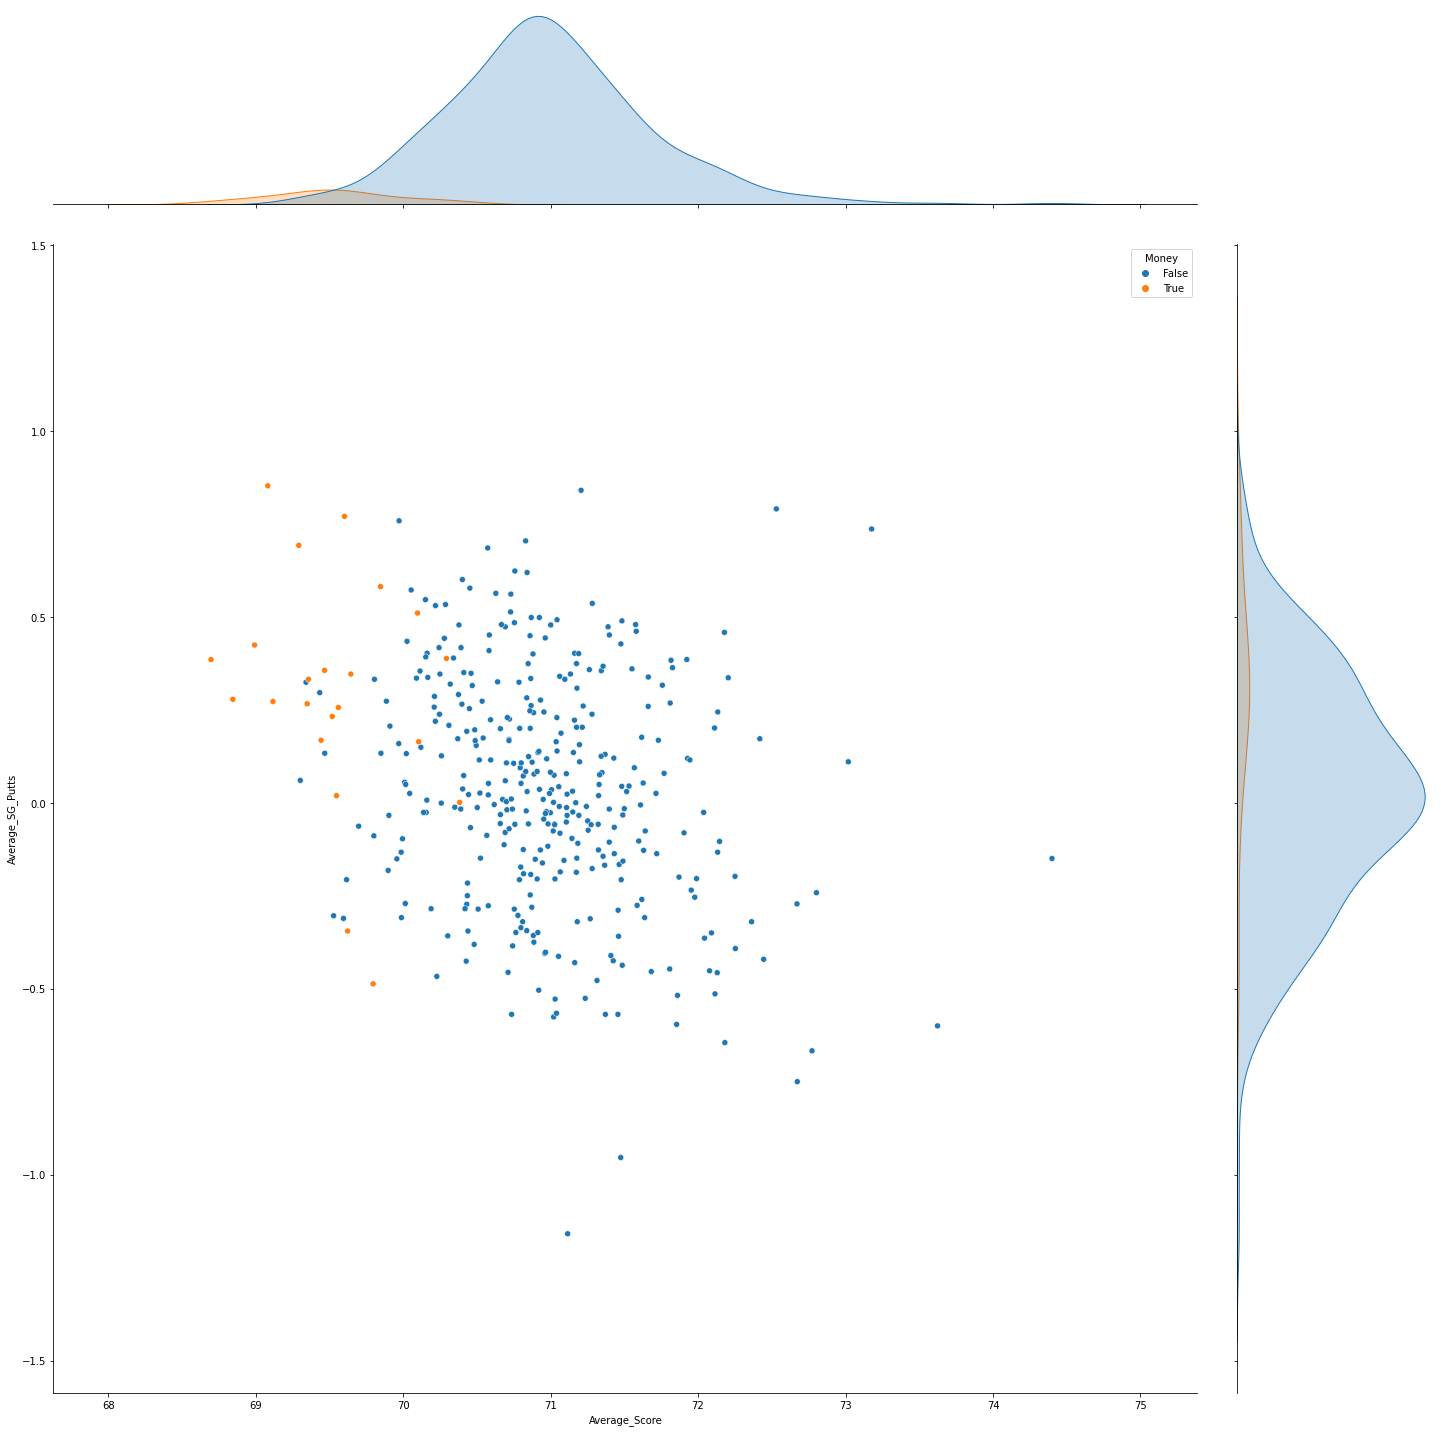

In [29]:
# Putting skills among the best players
# Orange dots should now appear on the left because the best putting players are going to have the lowest average score

sns.jointplot(x= df_golf.Average_Score, y= df_golf.Average_SG_Putts, hue= df_golf.Money > 4500000, height= 20)

In [30]:
# 7,8,9 & pitching irons

df_best_approachers =  df_golf[['Year', 'Player_Name', 'Wins', 'SG_APR']].copy()
df_best_approachers.sort_values(by = 'SG_APR', inplace = True, ascending = True)
df_best_approachers.head()

,Year,Player_Name,Wins,SG_APR
0,2018,Daniel Summerhays,0,-1.586
1,2017,Steven Bowditch,0,-1.260
2,2018,Greg Chalmers,0,-1.192
3,2018,Matt Atkins,0,-1.039
4,2017,Miguel Angel Carballo,0,-1.035


In [31]:
df_golf.drop(['level_0'], axis=1, inplace=True)

KeyError: "['level_0'] not found in axis"

In [32]:
df_golf.drop(['Unnamed: 0'], axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [39]:
df_golf.drop(['index'], axis=1, inplace=True)

In [34]:
df_golf.head()

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,...,Top_10,Average_SG_Putts,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money,driving_ranking,best_putters,best_approachers
0,Daniel Summerhays,51,54.69,2018,287.1,56.79,27.82,54.86,73.177,89,...,1,0.736,-2.105,-0.977,-1.586,-0.277,234510,77,376,0
1,Steven Bowditch,59,45.37,2017,287.3,53.54,29.20,51.96,74.400,9,...,0,-0.150,-2.889,-1.717,-1.260,0.238,24650,82,98,1
2,Greg Chalmers,56,58.90,2018,282.8,56.94,28.31,52.85,72.531,133,...,1,0.790,-1.266,-0.690,-1.192,-0.174,288023,37,379,2
3,Matt Atkins,56,57.50,2018,301.4,63.46,29.12,57.60,72.251,44,...,0,-0.198,-1.129,0.134,-1.039,-0.027,89104,302,83,3
4,Miguel Angel Carballo,63,63.61,2017,288.1,64.91,29.60,54.72,72.363,81,...,0,-0.320,-1.358,0.139,-1.035,-0.142,186623,88,51,4


In [28]:
# We rank best approachers

df_golf.sort_values(by = 'SG_APR', inplace = True, ascending = True)
df_golf.reset_index(drop=True, inplace = True)
df_golf['best_approachers'] = df_golf.index


df_golf.head()

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,...,Top_10,Average_SG_Putts,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money,driving_ranking,best_putters,best_approachers
0,Daniel Summerhays,51,54.69,2018,287.1,56.79,27.82,54.86,73.177,89,...,1,0.736,-2.105,-0.977,-1.586,-0.277,234510,77,376,0
1,Steven Bowditch,59,45.37,2017,287.3,53.54,29.20,51.96,74.400,9,...,0,-0.150,-2.889,-1.717,-1.260,0.238,24650,82,98,1
2,Greg Chalmers,56,58.90,2018,282.8,56.94,28.31,52.85,72.531,133,...,1,0.790,-1.266,-0.690,-1.192,-0.174,288023,37,379,2
3,Matt Atkins,56,57.50,2018,301.4,63.46,29.12,57.60,72.251,44,...,0,-0.198,-1.129,0.134,-1.039,-0.027,89104,302,83,3
4,Miguel Angel Carballo,63,63.61,2017,288.1,64.91,29.60,54.72,72.363,81,...,0,-0.320,-1.358,0.139,-1.035,-0.142,186623,88,51,4


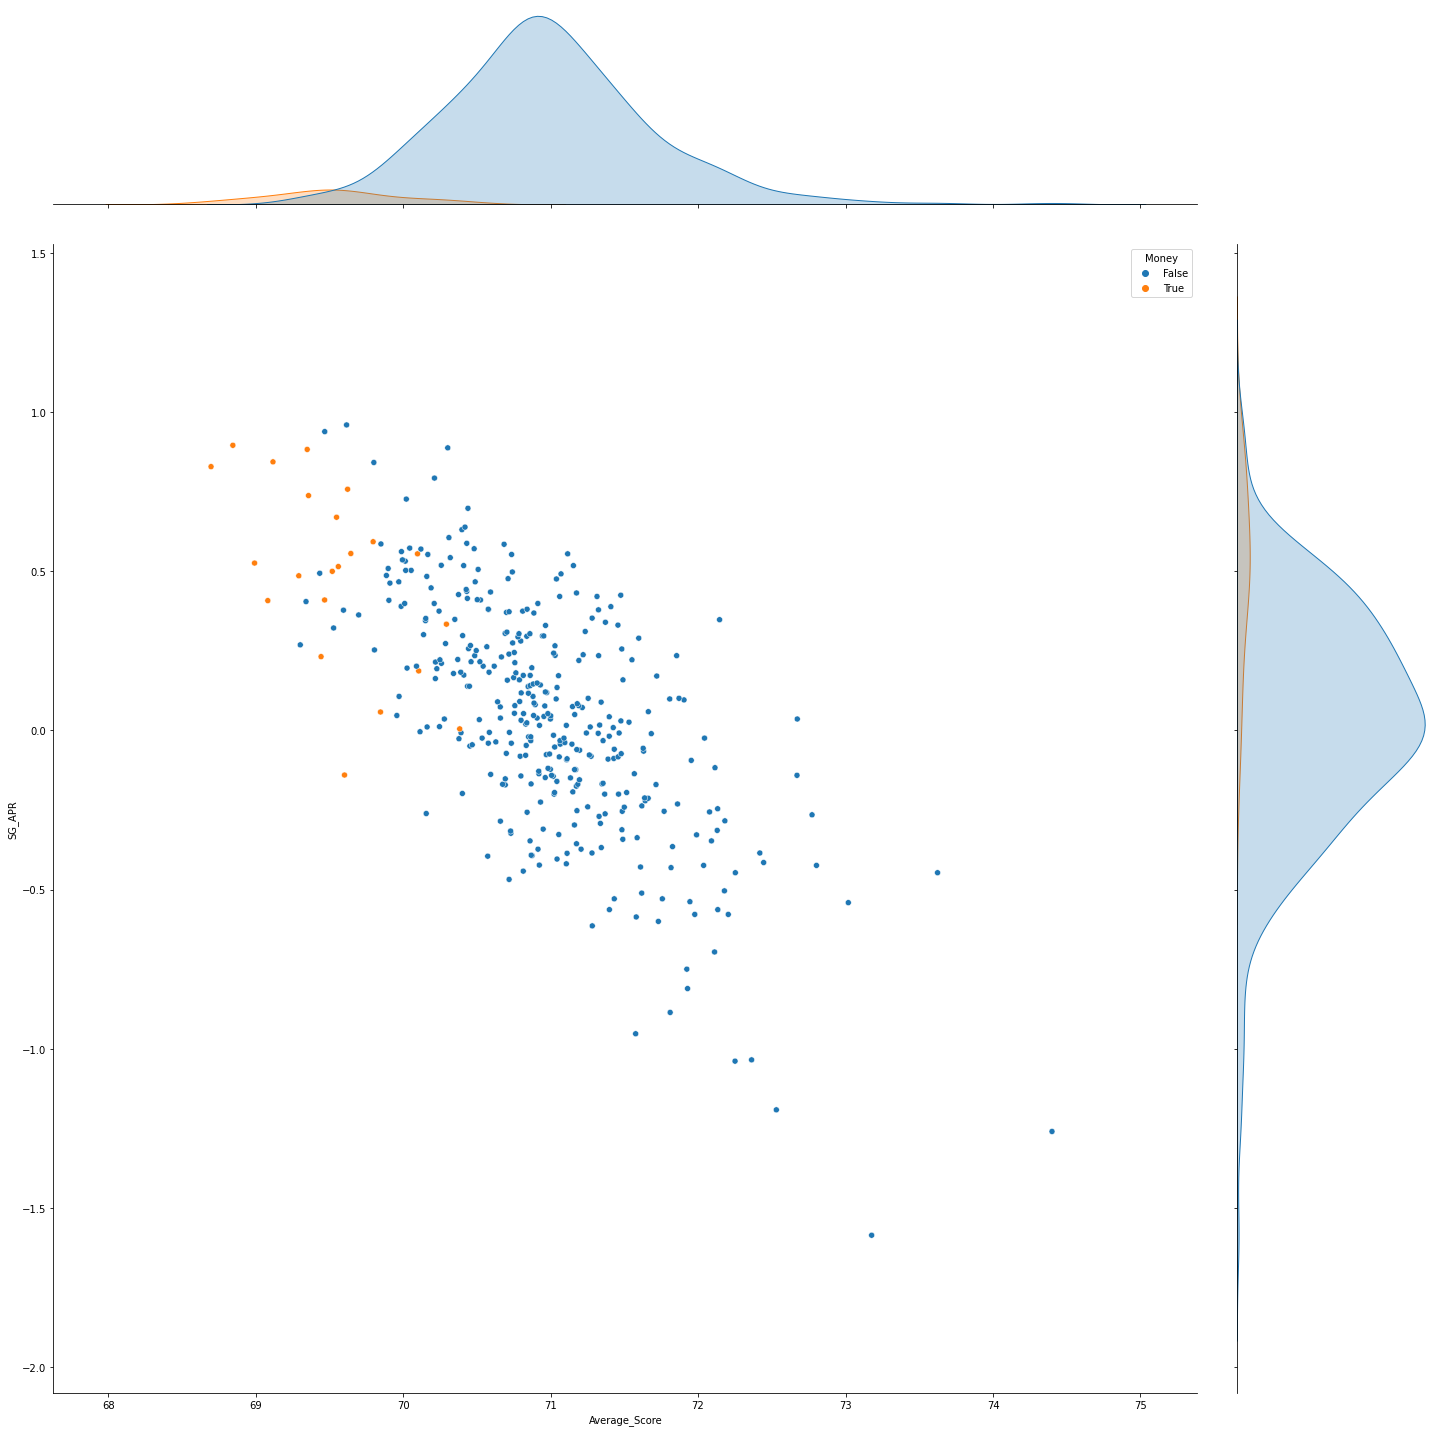

In [35]:
# Aproaching skills among the best players (7,8,9 and pitching irons)
# Orange dots should appear on the left of the chart again for the same reason

sns.jointplot(x= df_golf.Average_Score, y= df_golf.SG_APR, hue= df_golf.Money > 4500000, height= 20)

In [36]:
# Pitch and Wedge Cracks

df_best_pw = df_golf[['Year', 'Player_Name', 'Wins', 'SG_ARG']].copy()
df_best_pw.sort_values(by = 'SG_ARG', inplace = True, ascending = False)
df_best_pw.head()

,Year,Player_Name,Wins,SG_ARG
211,2018,Aaron Baddeley,0,0.595
237,2018,Patrick Reed,1,0.545
56,2017,Tim Wilkinson,0,0.538
140,2018,Jamie Lovemark,0,0.519
309,2017,Bill Haas,0,0.516


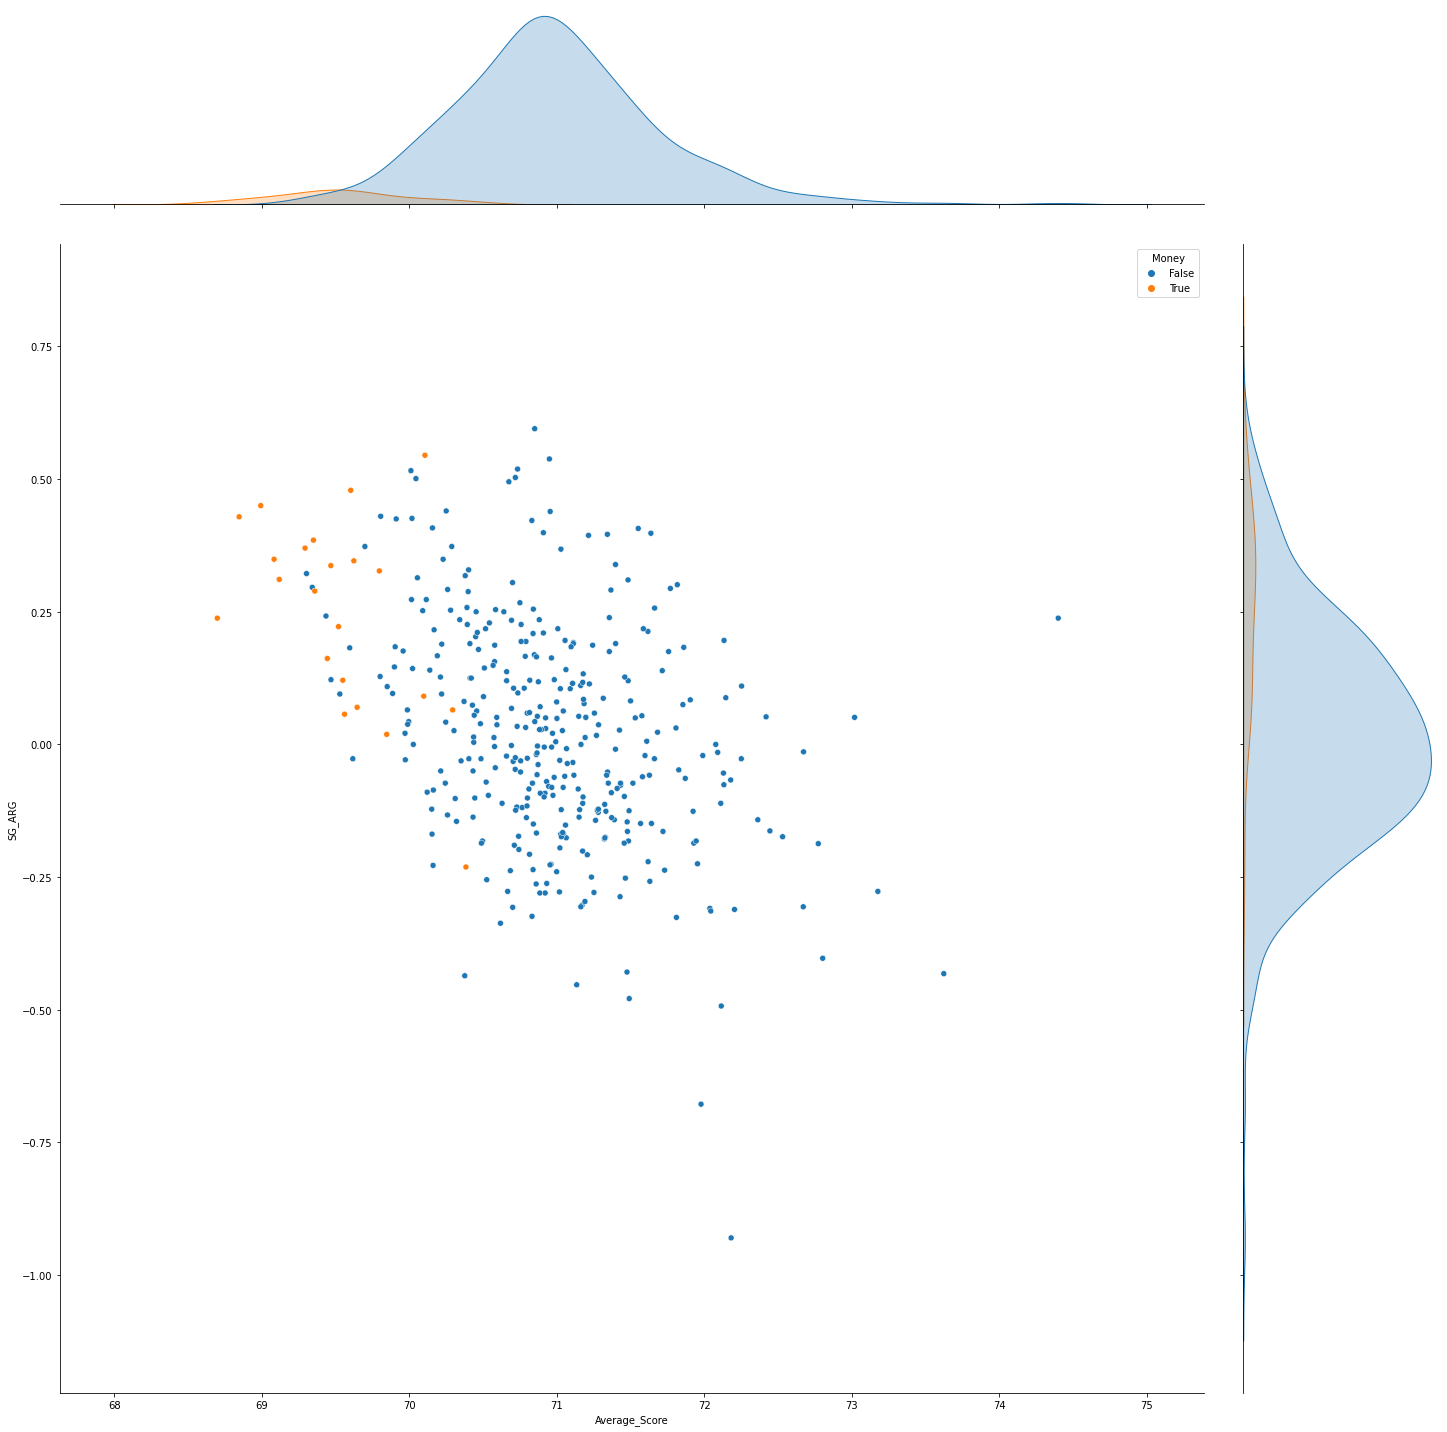

In [37]:
# Pitch and wedge cracks among the best players
# Again... orange should appear on the left side
sns.jointplot(x= df_golf.Average_Score, y= df_golf.SG_ARG, hue= df_golf.Money > 4500000, height= 20)

In [38]:
# We rank best pitchers

df_golf.sort_values(by = 'SG_ARG', inplace = True, ascending = True)
df_golf.reset_index(inplace = True)
df_golf['best_pw'] = df_golf.index


df_golf.head()

,index,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,...,Average_SG_Putts,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money,driving_ranking,best_putters,best_approachers,best_pw
0,60,Satoshi Kodaira,51,65.53,2018,293.6,60.30,29.88,51.02,72.182,...,-0.645,-1.832,0.027,-0.284,-0.930,1471462,176,4,60,0
1,13,Rick Lamb,54,64.81,2017,298.0,66.89,29.44,54.03,71.978,...,-0.254,-0.824,0.686,-0.578,-0.678,524372,244,70,13,1
2,112,Brett Stegmaier,78,64.66,2017,288.7,66.74,29.97,50.11,72.115,...,-0.514,-1.265,-0.141,-0.117,-0.493,271031,95,15,112,2
3,224,Kelly Kraft,75,60.06,2017,291.9,63.15,29.32,53.50,71.491,...,-0.157,-0.681,-0.205,0.159,-0.479,1638045,150,94,224,3
4,97,Hunter Mahan,67,65.04,2018,296.9,68.96,29.02,58.81,71.135,...,0.346,0.209,0.465,-0.149,-0.453,457337,231,311,97,4


#### With all these new columns I am going to create another one that multiplies each players ranking by its correlation to average scrore. This new column should order players by skills and should be a good indicative of who is most prepare to be next years top golfer

In [40]:
df_golf['Predictive_Ranking'] = (df_golf.driving_ranking * 0.403167) + (df_golf.best_putters * 0.277791) + (df_golf.best_approachers * 0.707785) + (df_golf.best_pw * 0.417551)

In [41]:
df_golf.head()

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,...,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money,driving_ranking,best_putters,best_approachers,best_pw,Predictive_Ranking
0,Satoshi Kodaira,51,65.53,2018,293.6,60.30,29.88,51.02,72.182,600,...,-1.832,0.027,-0.284,-0.930,1471462,176,4,60,0,114.535656
1,Rick Lamb,54,64.81,2017,298.0,66.89,29.44,54.03,71.978,269,...,-0.824,0.686,-0.578,-0.678,524372,244,70,13,1,127.436874
2,Brett Stegmaier,78,64.66,2017,288.7,66.74,29.97,50.11,72.115,131,...,-1.265,-0.141,-0.117,-0.493,271031,95,15,112,2,122.574752
3,Kelly Kraft,75,60.06,2017,291.9,63.15,29.32,53.50,71.491,672,...,-0.681,-0.205,0.159,-0.479,1638045,150,94,224,3,246.383897
4,Hunter Mahan,67,65.04,2018,296.9,68.96,29.02,58.81,71.135,234,...,0.209,0.465,-0.149,-0.453,457337,231,311,97,4,249.849927


In [24]:
df_golf.drop(['index'], axis=1, inplace=True)

In [42]:
df_golf.sort_values(by = ['Predictive_Ranking'], ascending = False, inplace = True)

In [43]:
df_golf.head()

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,...,Average_SG_Total,SG_OTT,SG_APR,SG_ARG,Money,driving_ranking,best_putters,best_approachers,best_pw,Predictive_Ranking
320,Dustin Johnson,77,59.46,2018,314.0,70.57,28.47,62.50,68.698,2717,...,2.372,0.919,0.829,0.238,8457352,374,327,374,320,639.950025
343,Justin Thomas,91,58.41,2018,311.8,68.77,28.33,62.47,69.118,2634,...,1.835,0.408,0.844,0.311,8694821,368,286,376,343,637.160835
335,Justin Thomas,86,54.09,2017,309.3,67.33,28.29,60.54,69.359,2689,...,1.724,0.452,0.738,0.289,9921560,359,302,371,335,631.097655
358,Tiger Woods,68,59.35,2018,303.6,67.40,28.49,64.16,69.350,1162,...,1.596,0.061,0.883,0.385,5443841,325,284,377,358,626.240122
372,Justin Rose,70,66.02,2018,303.5,69.95,28.67,63.03,68.993,1991,...,1.952,0.551,0.526,0.450,8130678,323,338,348,372,625.754451


In [44]:
df_golf.to_csv('modified_df_golf.csv')

#### We will now continue on the 3rd jupyter notebook, where we will obtain the true champions of 2019